# Spam Message Filter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from PIL import Image
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import classification_report 

In [2]:
data=pd.read_csv('spam.csv',encoding='latin-1')

### Data Cleaning and Text Pre-processing

In [50]:
data.head()

,Category,Message,filt_Message,Totalwords
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point avail bugi n great world la e buffet cine got amor wat,20
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18,28
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,11
4,0,"Nah I don't think he goes to usf, he lives around here though",nah think goe usf live around though,13


In [4]:
data.dropna(how="any", inplace=True, axis=1)
data.columns=['Category','Message']
data['Category']=data['Category'].map({'ham':0,'spam':1})
data.head()
Original=data.copy()

In [5]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
#nltk.download('punkt')
#nltk.download('stopwords')

In [7]:
def clean_msg(message):
    ''' Inputs the messages in the data
    1. Removes stopwords
    2. Removes punctuations
    Returns filtered message as a string'''
    stop_words=set(stopwords.words('english'))
    msg= message
    words=word_tokenize(msg.lower())
    filtered_msg=[]
    for elem in words:
        if(elem not in stop_words and elem.isalnum()):
            stemmer=PorterStemmer()
            stemmed=stemmer.stem(elem)
            filtered_msg.append(stemmed)
    return(' '.join(filtered_msg))

In [8]:
data['filt_Message']=data.Message.apply(clean_msg)

In [9]:
data.head()

,Category,Message,filt_Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


### Exploratory Data Analysis

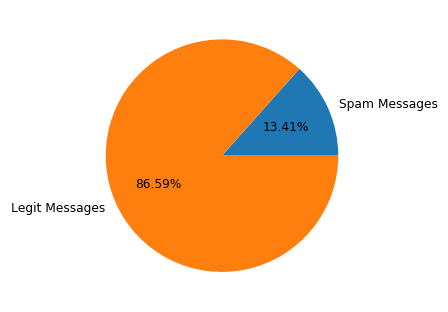

In [10]:
spam_count=data.Category.value_counts()[1]
ham_count=data.Category.value_counts()[0]
plt.figure(figsize=(3.5,3.5),dpi=110)
plt.pie([spam_count,ham_count],labels=['Spam Messages','Legit Messages'],textprops={'fontsize':8},autopct='%1.2f%%')
plt.show()

86.59% of our messages are Legit.

Number of total words used in a message can be a useful feature for us.

In [11]:
def totalwords(message):
    return(len(message.split()))
data['Totalwords']=data['Message'].apply(totalwords)

In [12]:
data.head()

,Category,Message,filt_Message,Totalwords
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point avail bugi n great world la e ...,20
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,28
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,11
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,13


Text(0.5, 1.0, 'Legit Messages')

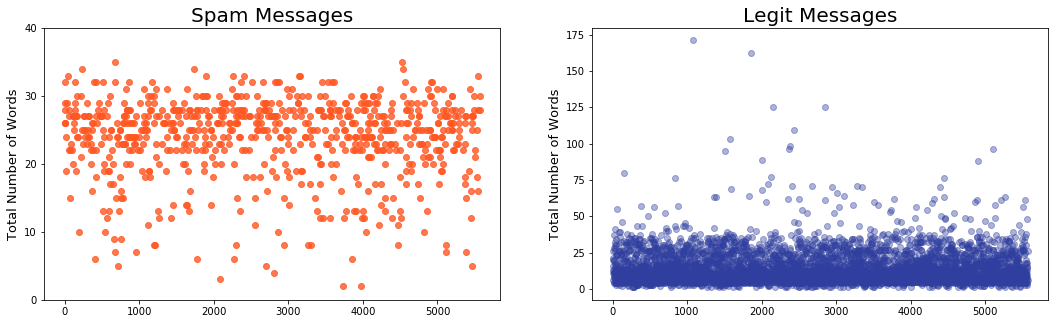

In [13]:
plt.figure(1,figsize=(18,5))

plt.subplot(1,2,1)
plt.scatter(x=data[data.Category==1].index,y=data[data.Category==1]['Totalwords'],alpha=0.8,color='#ff5722')
plt.ylabel('Total Number of Words',fontdict={'fontsize':13})
plt.title('Spam Messages',fontdict={'fontsize':20})
plt.yticks(np.arange(0,50,step=10))

plt.subplot(1,2,2)
plt.scatter(x=data[data.Category==0].index,y=data[data.Category==0]['Totalwords'],alpha=0.4,color='#303f9f')
plt.ylabel('Total Number of Words',fontdict={'fontsize':13})
plt.title('Legit Messages',fontdict={'fontsize':20})

A clear distinction can be seen between Spam and Legit Messages from above plots. Spam messages mostly contain more number of words(20-30) as compared to Non-spam messages (5-25).

In [14]:
spam=list(data[data.Category==1].filt_Message)
spam=' '.join(spam)
ham=list(data[data.Category==0].filt_Message)
ham=' '.join(ham)

In [15]:
file='mail.png'
icon=Image.open(file).convert('RGBA')
image_mask=Image.new(mode='RGBA',size=icon.size,color=(255,255,255))
image_mask.paste(icon,box=icon)
array=np.array(image_mask)

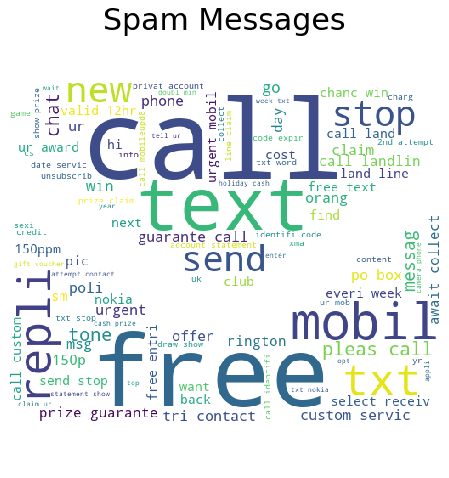

In [16]:

wordcloud_spam=WordCloud(mask=array,width=500,height=500,background_color='white',max_words=100).generate(spam)
plt.figure(figsize=(8,8),facecolor=None)
plt.axis('off')
plt.title('Spam Messages',fontdict={'fontsize':30})
plt.imshow(wordcloud_spam)

<function matplotlib.pyplot.show(*args, **kw)>

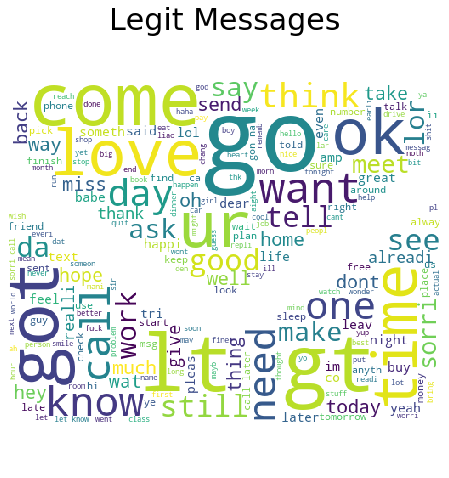

In [17]:
wordcloud_ham=WordCloud(mask=array,width=500,height=500,background_color='white',max_words=200).generate(ham)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud_ham)
plt.axis('off')
plt.title('Legit Messages',fontdict={'fontsize':30})
plt.show

## So with the help of these word clouds above, the words which are most frequently used in different class of messages are shown in larger sizes. 

### Spam messages: Free, Text, Call, mobile, reply, please call,chat, win, new, send

### Legit messages: got, time, love, go, know, think, need, home, still, ok
 
These are few most occuring words for spam and legit messages, respectively. Occurence of these words can be used to identify whether the message is spam or not.

## Building and Evaluating models

In [18]:
X=data.drop(['Message','Category'],axis=1)
Y=data['Category']

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(stop_words='english',ngram_range=(1, 2))
features=vectorizer.fit_transform(data.filt_Message)
final_X=pd.DataFrame(features.toarray())
#final_X['Total_words']=data.Totalwords
final_X.head()

,0,1,2,3,4,5,6,7,8,9,...,32127,32128,32129,32130,32131,32132,32133,32134,32135,32136
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Naive Bayes Classifier

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X, Y,test_size=0.3,random_state=6,shuffle=True)

In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
nb = MultinomialNB()
nb.fit(X_train,y_train)
Train_accuracy=nb.score(X_train,y_train)
Train_accuracy

0.9971794871794872

In [101]:
predictions=nb.predict(X_test)
Test_accuracy=nb.score(X_test,y_test)
Test_accuracy

0.9784688995215312

Confusion Matrix

In [78]:
confusion_mat=confusion_matrix(y_test,predictions)

[Text(0, 0.5, 'Not spam'), Text(0, 1.5, 'Spam')]

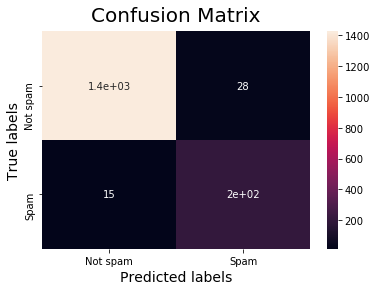

In [79]:
ax= plt.subplot()
sns.heatmap(confusion_mat, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels',fontsize=14)
ax.set_ylabel('True labels',fontsize=14) 
ax.set_title('Confusion Matrix',fontdict={'fontsize':20}, pad=10) 
ax.xaxis.set_ticklabels(['Not spam', 'Spam'],fontsize=10)
ax.yaxis.set_ticklabels(['Not spam', 'Spam'],fontsize=10)

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1454
           1       0.88      0.93      0.90       218

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.94      1672
weighted avg       0.98      0.97      0.97      1672



Text(0.5, 1.0, 'ROC Curve (AUC = 0.979)')

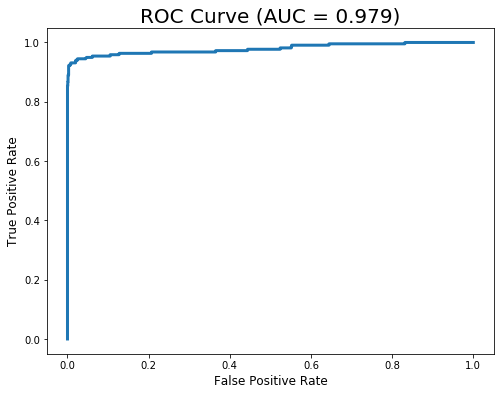

In [81]:
probs = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)
plt.figure(figsize=[8,6])
plt.plot(fpr,tpr,linewidth=3)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
label='ROC Curve (AUC = '+ str(round(auc,3))+')'
plt.title(label,fontsize=20)

In [82]:
Combined=y_test.to_frame(name='y')
Combined['prediction']=predictions

In [83]:
False_spam=list(Combined[Combined.prediction>Combined.y].index)
Missed_spam=list(Combined[Combined.prediction<Combined.y].index)

### Incorrectly classified Spam Messages

In [88]:
pd.set_option('display.max_colwidth', None)
Original.loc[False_spam,'Message']

33                                                               For fear of fainting with the of all that housework you just did? Quick have a cuppa
2217                                                                              * Will have two more cartons off u and is very pleased with shelves
4539                                        Urgh, coach hot, smells of chip fat! Thanks again, especially for the duvet (not a predictive text word).
4598                                                                                                          Have you laid your airtel line to rest?
4364                                                          Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.
5081                          \HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA ALETTER THATMUM GOTMARRIED 4thNOV.BEHIND OURBACKS åÐ FUCKINNICE!SELFISH
3330                                                                                                

### Missed Spam Messages

In [85]:
pd.set_option('display.max_colwidth',None)
Original.loc[Missed_spam,'Message']

3528       Xmas & New Years Eve tickets are now on sale from the club, during the day from 10am till 8pm, and on Thurs, Fri & Sat night this week. They're selling fast!
3417                            LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms
2773                                        How come it takes so little time for a child who is afraid of the dark to become a teenager who wants to stay out all night?
1457          CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
190                                                                                             Are you unique enough? Find out from 30th August. www.areyouunique.co.uk
2429            Guess who am I?This is the first time I created a web page WWW.ASJESUS.COM read all I wrote. I'm waiting for your opinions. I want to be yo

### Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20)
rfc_model = rfc.fit(X_train, y_train)

Train_accuracy_rfc=rfc_model.score(X_train,y_train)
Train_accuracy_rfc

0.9969230769230769

In [104]:
predict_rfc=rfc_model.predict(X_test)
Test_accuracy_rfc=rfc_model.score(X_test,y_test)
Test_accuracy_rfc

0.9563397129186603

In [117]:
probs_rfc = rfc_model.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs_rfc)
auc

0.9748676094040968

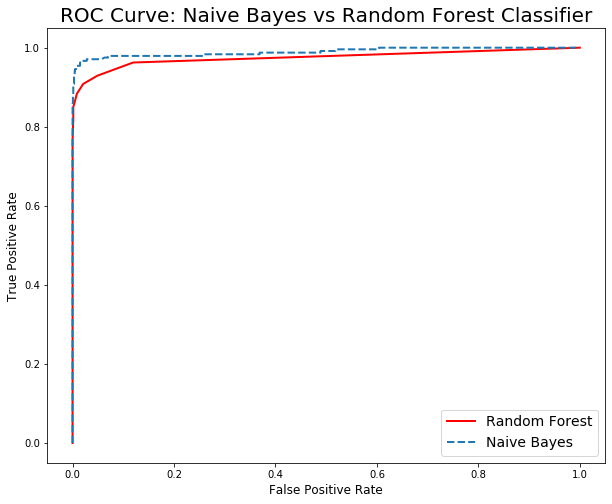

In [130]:
plt.figure(figsize=[10,8])
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, probs_rfc)
auc_rfc = metrics.roc_auc_score(y_test, probs_rfc)
plt.plot(fpr_rfc,tpr_rfc,linewidth=2,color='r')

plt.plot(fpr,tpr,linewidth=2, linestyle='--')
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC Curve: Naive Bayes vs Random Forest Classifier',fontsize=20)
plt.legend(('Random Forest','Naive Bayes'),fontsize=14, loc='best')

Clearly Naive Bayes Classifier performs better than Random Forest Classifier. 

Also condering Human accuracy =100%, Random Forest Classifier overfits tha data a little. One of the possible reason may be too many features present in the training data set.

In [32]:
def nb_spam_filter(Example):
    Example_clean=[clean_msg(Example)]
    x=vectorizer.transform(Example_clean)
    if nb.predict(x)==1:
        print('It is a spam')
    else:
        print('Its not a spam')